In [31]:
#from braindecode.datasets.tuh import _TUHMock as TUH
from braindecode.datasets import TUH
import mne
import seaborn as sns
import pyedflib
from physionet2023.dataProcessing.TuhDatasets import TuhPatientDataset
from physionet2023.dataProcessing.patientDatasets import AvgSpectralDensityDataset
import numpy as np

In [23]:
tuh_ds = TuhPatientDataset(tuh_dir="../tuh/edf")
physionet_ds = AvgSpectralDensityDataset(root_folder="../data")

In [24]:
tuh_sample = tuh_ds[10000]
tuh_sample.shape

EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=18, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Added the following bipolar channels:
Fp1-F7, F7-T3, T3-T5, T5-O1, Fp2-F8, F8-T4, T4-T6, T6-O2, Fp1-F3, F3-C3, C3-P3, P3-O1, Fp2-F4, F4-C4, C4-P4, P4-O2, Fz-Cz, Cz-Pz


torch.Size([30])

In [25]:
physionet_sample = physionet_ds[0][0]
physionet_sample.shape


torch.Size([1, 75])

In [55]:
wf, sfreq = tuh_ds._get_physionet_channels(10000)
psd , _ = mne.time_frequency.psd_array_welch(wf[0,:], sfreq=sfreq, fmin=12, fmax=30, verbose=False, n_fft=int(sfreq * 100))
psd.shape

EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=18, n_times=300750
    Range : 0 ... 300749 =      0.000 ...  1202.996 secs
Ready.
Added the following bipolar channels:
Fp1-F7, F7-T3, T3-T5, T5-O1, Fp2-F8, F8-T4, T4-T6, T6-O2, Fp1-F3, F3-C3, C3-P3, P3-O1, Fp2-F4, F4-C4, C4-P4, P4-O2, Fz-Cz, Cz-Pz


(1801,)

<AxesSubplot:>

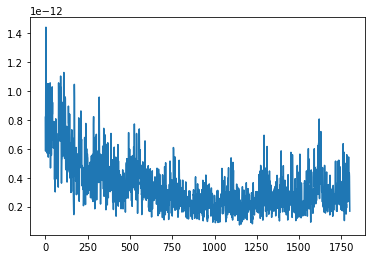

In [56]:
sns.lineplot(x=range(0, len(psd)), y=psd)

In [32]:
sample_fft = np.zeros_like(wf)
for channel_idx in range(0, wf.shape[0]):
    sample_fft[channel_idx, :] = np.abs(
        np.fft.fft(wf[channel_idx, :])
    )

sample_fft.shape

(18, 300250)

In [38]:
a = np.abs(np.fft.fft(wf, axis=1))
a.shape

(18, 300250)

<AxesSubplot:>

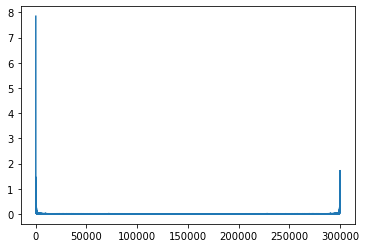

In [39]:
sns.lineplot(x=range(0, a.shape[-1]), y=a[0, :])

In [42]:
a

array([[ 7.84649912,  0.526236  ,  1.42520443, ...,  0.75068402,
         1.42520443,  0.526236  ],
       [ 3.1500294 ,  0.54036296,  0.54422301, ...,  0.29451606,
         0.54422301,  0.54036296],
       [ 1.79497713,  0.11585127,  0.70812635, ...,  0.58426697,
         0.70812635,  0.11585127],
       ...,
       [31.21521513, 14.24867527, 14.25012879, ..., 10.20689206,
        14.25012879, 14.24867527],
       [ 5.97250401,  2.0910944 ,  1.59576875, ...,  2.65565948,
         1.59576875,  2.0910944 ],
       [11.61964423,  3.64150533,  3.6125859 , ...,  1.34549521,
         3.6125859 ,  3.64150533]])